## Step 1: Web Scraping and Dataset

In [88]:
import requests
from bs4 import BeautifulSoup as bs
import json
import math
import pandas as pd

def getInfo(url):
    res=requests.get(url)
    soup = bs(res.content, 'lxml')
    data = json.loads(soup.select_one('[type="application/ld+json"]').text.strip()[:-1])[0]
    return data

def addItems(data):
    result = []
    for item in data['review']:

        review = {    
                  'Headline': item['headline'] ,
                  'Ranking': item['reviewRating']['ratingValue'],
                  'Review': item['reviewBody'],
                  'ReviewDate': item['datePublished']
                }

        result.append(review)
    return result

url = 'https://www.trustpilot.com/review/www.fitbit.com?languages=en'
results = []
data = getInfo(url.format(1))
results.append(addItems(data))  
totalReviews = int(data['aggregateRating']['reviewCount'])
reviewsPerPage = len(data['review'])
totalPages = math.ceil(totalReviews/reviewsPerPage)

if totalPages > 1:
    for page in range(2, totalPages + 1):
        data = getInfo(url.format(page))
        results.append(addItems(data)) 

final = [item for result in results for item in result]
fitbit_df = pd.DataFrame(final)
fitbit_df.head(3)

,Headline,Ranking,Review,ReviewDate
0,Very bad CS and not waterproof at all,1,Very bad customer service. Very disappointed b...,2019-12-17T03:58:53Z
1,WORST CUSTOMER SERVICE EVER,1,Only typed one star because there was no optio...,2019-12-14T17:17:12Z
2,The wrist straps are way too small for…,1,The wrist straps are way too small for the men...,2019-12-14T03:16:18Z


In [89]:
import requests
from bs4 import BeautifulSoup as bs
import json
import math
import pandas as pd

def getInfo(url):
    res=requests.get(url)
    soup = bs(res.content, 'lxml')
    data = json.loads(soup.select_one('[type="application/ld+json"]').text.strip()[:-1])[0]
    return data

def addItems(data):
    result = []
    for item in data['review']:

        review = {    
                  'Headline': item['headline'] ,
                  'Ranking': item['reviewRating']['ratingValue'],
                  'Review': item['reviewBody'],
                  'ReviewDate': item['datePublished']
                }

        result.append(review)
    return result

url = 'https://www.trustpilot.com/review/www.fossil.com?languages=en'
results = []
data = getInfo(url.format(1))
results.append(addItems(data))  
totalReviews = int(data['aggregateRating']['reviewCount'])
reviewsPerPage = len(data['review'])
totalPages = math.ceil(totalReviews/reviewsPerPage)

if totalPages > 1:
    for page in range(2, totalPages + 1):
        data = getInfo(url.format(page))
        results.append(addItems(data)) 

final = [item for result in results for item in result]
fossil_df = pd.DataFrame(final)
fossil_df.head(3)

,Headline,Ranking,Review,ReviewDate
0,OMG I was going to add my experience…,1,OMG I was going to add my experience but looki...,2019-12-12T16:38:14Z
1,Ordered two watches totalling $395,1,Ordered two watches totalling $395. When I or...,2019-12-12T12:36:14Z
2,GARBAGE CUSTOMER SERVICE,1,They have the most GARBAGE CUSTOMER SERVICE yo...,2019-12-10T21:22:39Z


## Step 2: Visualising Ranking Stars

Text(0.5, 0, 'Ranking Stars')

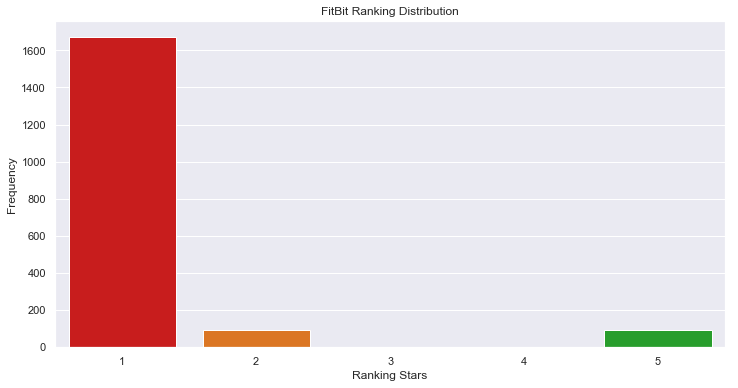

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
colors = ["red", "orange", "brown", "blue","green"]
cat_dtype = pd.api.types.CategoricalDtype(categories=["1","2","3","4","5"], ordered=True)
fitbit_df['Ranking'] = fitbit_df.Ranking.astype(cat_dtype)
sns.countplot(fitbit_df['Ranking'],palette=sns.xkcd_palette(colors))
plt.title('FitBit Ranking Distribution')
plt.ylabel('Frequency')
plt.xlabel('Ranking Stars')

Text(0.5, 0, 'Ranking Stars')

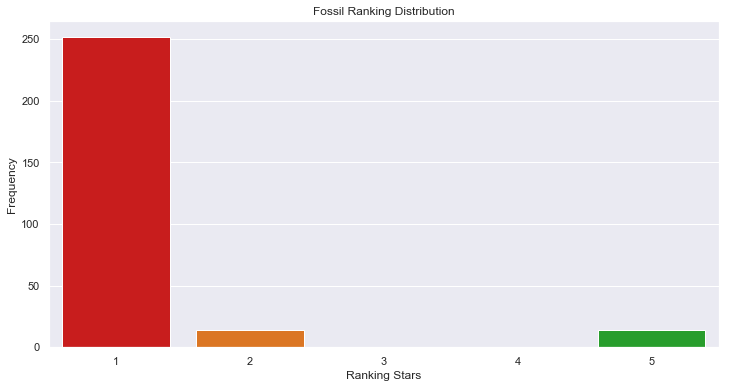

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
colors = ["red", "orange", "brown", "blue","green"]
cat_dtype = pd.api.types.CategoricalDtype(categories=["1","2","3","4","5"], ordered=True)
fossil_df['Ranking'] = fitbit_df.Ranking.astype(cat_dtype)
sns.countplot(fossil_df['Ranking'],palette=sns.xkcd_palette(colors))
plt.title('Fossil Ranking Distribution')
plt.ylabel('Frequency')
plt.xlabel('Ranking Stars')

## Step 3: Cleaning Dataset

### 3.1 : Remove Punctuations

In [92]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [93]:
fitbit_df['Headline'] = fitbit_df['Headline'].apply(remove_punctuations)
fitbit_df['Review'] = fitbit_df['Review'].apply(remove_punctuations)
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,Very bad CS and not waterproof at all,1,Very bad customer service Very disappointed b...,2019-12-17T03:58:53Z
1,WORST CUSTOMER SERVICE EVER,1,Only typed one star because there was no optio...,2019-12-14T17:17:12Z


In [94]:
fossil_df['Headline'] = fossil_df['Headline'].apply(remove_punctuations)
fossil_df['Review'] = fossil_df['Review'].apply(remove_punctuations)
fossil_df.tail(2)

,Headline,Ranking,Review,ReviewDate
278,Fossil products customer care,1,St Enoch centre store took in my very loved w...,2019-10-27T12:05:18Z
279,Poor and very slow customer service,1,Poor and very slow customer service \n\nTake a...,2019-10-22T13:20:57Z


### 3.2 : Make texts become lowercase

In [95]:
fitbit_df['Headline'] = fitbit_df['Headline'].str.lower()
fitbit_df['Review'] = fitbit_df['Review'].str.lower()
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,very bad cs and not waterproof at all,1,very bad customer service very disappointed b...,2019-12-17T03:58:53Z
1,worst customer service ever,1,only typed one star because there was no optio...,2019-12-14T17:17:12Z


In [96]:
fossil_df['Headline'] = fossil_df['Headline'].str.lower()
fossil_df['Review'] = fossil_df['Review'].str.lower()
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,omg i was going to add my experience…,1,omg i was going to add my experience but looki...,2019-12-12T16:38:14Z
1,ordered two watches totalling 395,1,ordered two watches totalling 395 when i or...,2019-12-12T12:36:14Z


### 3.3 : Remove unnecessary words

In [97]:
fitbit_df = fitbit_df.replace('\n',' ', regex=True)
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,very bad cs and not waterproof at all,1,very bad customer service very disappointed b...,2019-12-17T03:58:53Z
1,worst customer service ever,1,only typed one star because there was no optio...,2019-12-14T17:17:12Z


In [98]:
fossil_df = fossil_df.replace('\n',' ', regex=True)
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,omg i was going to add my experience…,1,omg i was going to add my experience but looki...,2019-12-12T16:38:14Z
1,ordered two watches totalling 395,1,ordered two watches totalling 395 when i or...,2019-12-12T12:36:14Z


### 3.4 Lemmetize Words

In [99]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
fitbit_df['Headline'] = fitbit_df['Headline'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
fitbit_df['Review'] = fitbit_df['Review'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,very bad cs and not waterproof at all,1,very bad customer service very disappoint by t...,2019-12-17T03:58:53Z
1,worst customer service ever,1,only type one star because there be no option ...,2019-12-14T17:17:12Z


In [100]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
fossil_df['Headline'] = fossil_df['Headline'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
fossil_df['Review'] = fossil_df['Review'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate
0,omg i be go to add my experience…,1,omg i be go to add my experience but look at t...,2019-12-12T16:38:14Z
1,order two watch total 395,1,order two watch total 395 when i order a hold ...,2019-12-12T12:36:14Z


### 3.5 : Remove Stopwords

In [101]:
from nltk.corpus import stopwords
import numpy as np
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)
sw.extend(['would','wouldn','they', 'via'])

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [102]:
fitbit_df['Review_Keywords'] = fitbit_df['Review'].apply(stopwords)
fitbit_df['Headline_Keywords'] = fitbit_df['Headline'].apply(stopwords)
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords
0,very bad cs and not waterproof at all,1,very bad customer service very disappoint by t...,2019-12-17T03:58:53Z,bad customer service disappoint product say go...,bad cs waterproof
1,worst customer service ever,1,only type one star because there be no option ...,2019-12-14T17:17:12Z,type one star option star bad customer service...,worst customer service ever


In [103]:
fossil_df['Review_Keywords'] = fossil_df['Review'].apply(stopwords)
fossil_df['Headline_Keywords'] = fossil_df['Headline'].apply(stopwords)
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords
0,omg i be go to add my experience…,1,omg i be go to add my experience but look at t...,2019-12-12T16:38:14Z,omg go add experience look others nothing add ...,omg go add experience…
1,order two watch total 395,1,order two watch total 395 when i order a hold ...,2019-12-12T12:36:14Z,order two watch total 395 order hold immediate...,order two watch total 395


In [104]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
fitbit_df['Review_Tokenized_Keywords'] = fitbit_df['Review'].apply(lambda x: [item for item in x.split() if item not in stop])
fitbit_df['Headline_Tokenized_Keywords'] = fitbit_df['Headline'].apply(lambda x: [item for item in x.split() if item not in stop])
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenized_Keywords
0,very bad cs and not waterproof at all,1,very bad customer service very disappoint by t...,2019-12-17T03:58:53Z,bad customer service disappoint product say go...,bad cs waterproof,"[bad, customer, service, disappoint, product, ...","[bad, cs, waterproof]"
1,worst customer service ever,1,only type one star because there be no option ...,2019-12-14T17:17:12Z,type one star option star bad customer service...,worst customer service ever,"[type, one, star, option, star, bad, customer,...","[worst, customer, service, ever]"


In [105]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
fossil_df['Review_Tokenized_Keywords'] = fossil_df['Review'].apply(lambda x: [item for item in x.split() if item not in stop])
fossil_df['Headline_Tokenozed_Keywords'] = fossil_df['Headline'].apply(lambda x: [item for item in x.split() if item not in stop])
fossil_df.tail(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenozed_Keywords
278,fossil products customer care,1,st enoch centre store take in my very love wat...,2019-10-27T12:05:18Z,st enoch centre store take love watch stop wor...,fossil products customer care,"[st, enoch, centre, store, take, love, watch, ...","[fossil, products, customer, care]"
279,poor and very slow customer service,1,poor and very slow customer service take age t...,2019-10-22T13:20:57Z,poor slow customer service take age come back ...,poor slow customer service,"[poor, slow, customer, service, take, age, com...","[poor, slow, customer, service]"


### 3.6 Change Review date format

In [106]:
from datetime import datetime
fitbit_df['ReviewDate'] = fitbit_df['ReviewDate'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenized_Keywords
0,very bad cs and not waterproof at all,1,very bad customer service very disappoint by t...,2019-12-17 03:58:53,bad customer service disappoint product say go...,bad cs waterproof,"[bad, customer, service, disappoint, product, ...","[bad, cs, waterproof]"
1,worst customer service ever,1,only type one star because there be no option ...,2019-12-14 17:17:12,type one star option star bad customer service...,worst customer service ever,"[type, one, star, option, star, bad, customer,...","[worst, customer, service, ever]"


In [107]:
from datetime import datetime
fossil_df['ReviewDate'] = fossil_df['ReviewDate'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenozed_Keywords
0,omg i be go to add my experience…,1,omg i be go to add my experience but look at t...,2019-12-12 16:38:14,omg go add experience look others nothing add ...,omg go add experience…,"[omg, go, add, experience, look, others, nothi...","[omg, go, add, experience…]"
1,order two watch total 395,1,order two watch total 395 when i order a hold ...,2019-12-12 12:36:14,order two watch total 395 order hold immediate...,order two watch total 395,"[order, two, watch, total, 395, order, hold, i...","[order, two, watch, total, 395]"


### 3.7 : Subset into High and Low ratings

In [108]:
fitbit_df['Ranking'] = fitbit_df['Ranking'].astype(float)
fitbit_df_High_rating = fitbit_df[(fitbit_df['Ranking'] > 3)]
fitbit_df_Low_rating = fitbit_df[(fitbit_df['Ranking'] <= 3)]

## Saving Dataset as CSV File

In [109]:
fitbit_df.to_csv(r'C:\Users\Lenovo\OneDrive for Business\USM 2019\DATA SCIENCE\CDS 511 - CONSUMER BEHAVIORIAL AND SOCIAL MEDIA ANALYTICS\ASSIGNMENTS\ASSIGNMENT 2\FitBit.csv')
fossil_df.to_csv(r'C:\Users\Lenovo\OneDrive for Business\USM 2019\DATA SCIENCE\CDS 511 - CONSUMER BEHAVIORIAL AND SOCIAL MEDIA ANALYTICS\ASSIGNMENTS\ASSIGNMENT 2\Fossil.csv')

## Step 4: Analysing keywords

### 4.1 : Determine Top Words for each brand

Text(0.5, 1.0, 'Top 10 words for Fitbit')

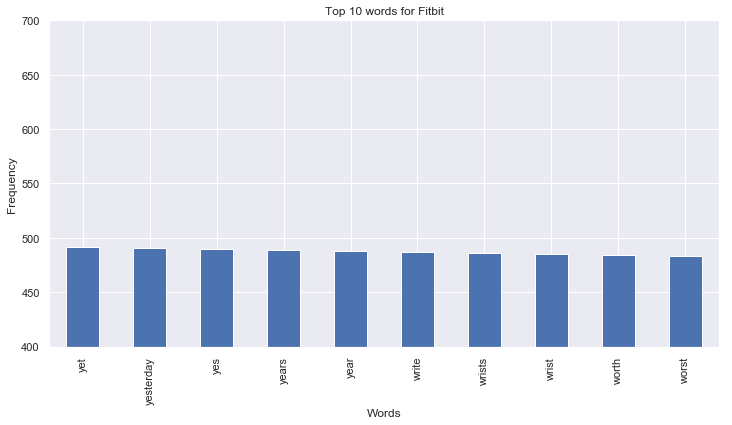

In [144]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(fitbit_df['Review_Keywords'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vacab_fitbit = vocab_bef_stem.head(10)
top_vacab_fitbit.plot(kind = 'bar', ylim=(400,700))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words for Fitbit')

Text(0.5, 1.0, 'Top 10 words for Fossil')

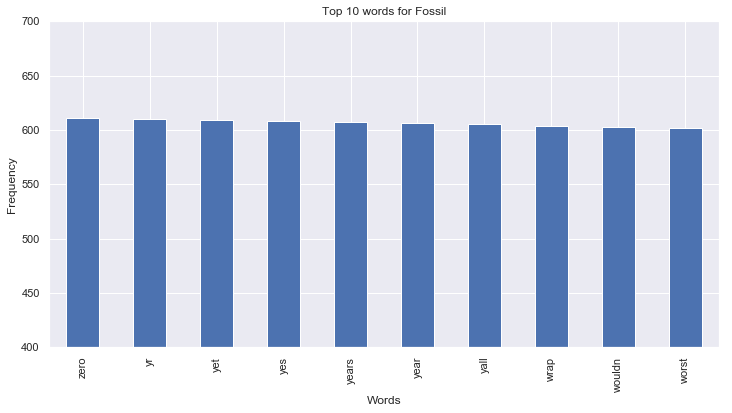

In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(fossil_df['Review_Keywords'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vacab_fossil = vocab_bef_stem.head(10)
top_vacab_fossil.plot(kind = 'bar', ylim=(400,700))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words for Fossil')

### 4.2 : Generating Word Cloud

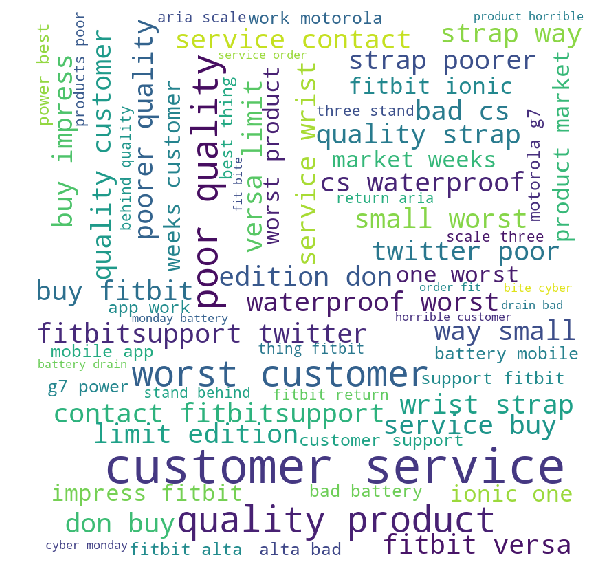

In [112]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)

for val in fitbit_df.Headline_Keywords: 
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

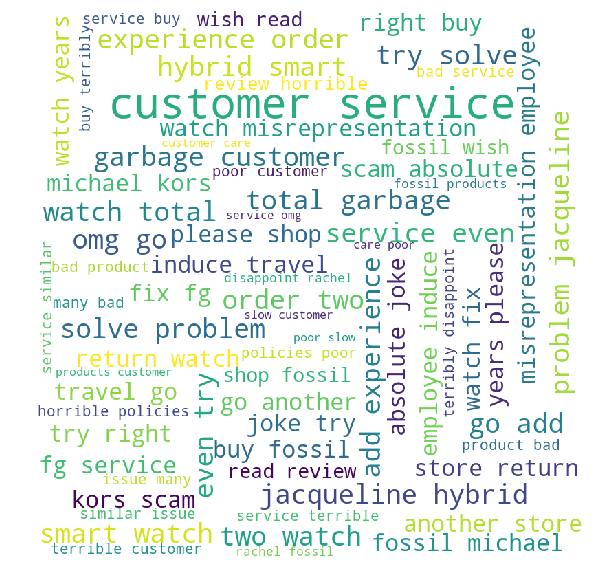

In [113]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)

for val in fossil_df.Headline_Keywords: 
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### 4.3 : Determine Text Length for each brand

In [114]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [115]:
fitbit_df['length'] = fitbit_df['Review'].apply(length)
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenized_Keywords,length
0,very bad cs and not waterproof at all,1.0,very bad customer service very disappoint by t...,2019-12-17 03:58:53,bad customer service disappoint product say go...,bad cs waterproof,"[bad, customer, service, disappoint, product, ...","[bad, cs, waterproof]",516
1,worst customer service ever,1.0,only type one star because there be no option ...,2019-12-14 17:17:12,type one star option star bad customer service...,worst customer service ever,"[type, one, star, option, star, bad, customer,...","[worst, customer, service, ever]",441


In [116]:
fossil_df['length'] = fossil_df['Review'].apply(length)
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenozed_Keywords,length
0,omg i be go to add my experience…,1,omg i be go to add my experience but look at t...,2019-12-12 16:38:14,omg go add experience look others nothing add ...,omg go add experience…,"[omg, go, add, experience, look, others, nothi...","[omg, go, add, experience…]",462
1,order two watch total 395,1,order two watch total 395 when i order a hold ...,2019-12-12 12:36:14,order two watch total 395 order hold immediate...,order two watch total 395,"[order, two, watch, total, 395, order, hold, i...","[order, two, watch, total, 395]",658


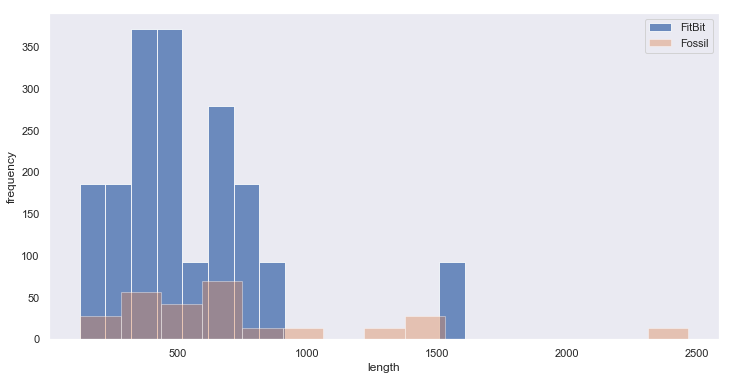

In [117]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 15
plt.hist(fitbit_df['length'], alpha = 0.8, bins=bins, label='FitBit')
plt.hist(fossil_df['length'], alpha = 0.4, bins=bins, label='Fossil')
plt.xlabel('length')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### 4.3 : Determine Polarity of sentences

In [129]:
from textblob import TextBlob
def sentiment_textblob(feedback): 
    senti = TextBlob(feedback) 
    polarity = senti.sentiment.polarity 
    if -1 <= polarity < 0: label = 'negative sentiment' 
    elif polarity == 0 : label = 'neutral sentiment' 
    elif 0 < polarity <= 1: label = 'positive sentiment'
    return (label)

def sentiment_score(feedback): 
    senti = TextBlob(feedback) 
    polarity = senti.sentiment.polarity 
    return (polarity)

def opinion_textblob(feedback): 
    senti = TextBlob(feedback) 
    subjectivity = senti.sentiment.subjectivity
    if 0 <= subjectivity <= 0.5: label = 'public opinion'
    elif 0.5 < subjectivity <= 1: label = 'private opinion'
    return (label)

In [130]:
fitbit_df['Polarity'] = fitbit_df['Review_Keywords'].apply(lambda x: sentiment_textblob(x))
fitbit_df['Opinion'] = fitbit_df['Review_Keywords'].apply(lambda x: opinion_textblob(x))
fitbit_df['Polarity_Score'] = fitbit_df['Review_Keywords'].apply(lambda x: sentiment_score(x))
fitbit_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenized_Keywords,length,Polarity,Opinion,Polarity_Score
0,very bad cs and not waterproof at all,1.0,very bad customer service very disappoint by t...,2019-12-17 03:58:53,bad customer service disappoint product say go...,bad cs waterproof,"[bad, customer, service, disappoint, product, ...","[bad, cs, waterproof]",516,negative sentiment,public opinion,-0.064583
1,worst customer service ever,1.0,only type one star because there be no option ...,2019-12-14 17:17:12,type one star option star bad customer service...,worst customer service ever,"[type, one, star, option, star, bad, customer,...","[worst, customer, service, ever]",441,negative sentiment,public opinion,-0.166667


In [131]:
fossil_df['Polarity'] = fossil_df['Review_Keywords'].apply(lambda x: sentiment_textblob(x))
fossil_df['Opinion'] = fossil_df['Review_Keywords'].apply(lambda x: opinion_textblob(x))
fossil_df['Polarity_Score'] = fossil_df['Review_Keywords'].apply(lambda x: sentiment_score(x))
fossil_df.head(2)

,Headline,Ranking,Review,ReviewDate,Review_Keywords,Headline_Keywords,Review_Tokenized_Keywords,Headline_Tokenozed_Keywords,length,Polarity,Opinion,Polarity_Score
0,omg i be go to add my experience…,1,omg i be go to add my experience but look at t...,2019-12-12 16:38:14,omg go add experience look others nothing add ...,omg go add experience…,"[omg, go, add, experience, look, others, nothi...","[omg, go, add, experience…]",462,positive sentiment,public opinion,0.100000
1,order two watch total 395,1,order two watch total 395 when i order a hold ...,2019-12-12 12:36:14,order two watch total 395 order hold immediate...,order two watch total 395,"[order, two, watch, total, 395, order, hold, i...","[order, two, watch, total, 395]",658,negative sentiment,public opinion,-0.180556


In [132]:
cat_dtype = pd.api.types.CategoricalDtype(categories=["negative sentiment","neutral sentiment","positive sentiment"], ordered=True)
fitbit_df['Polarity'] = fitbit_df.Polarity.astype(cat_dtype)

Text(0.5, 0, 'Sentiments')

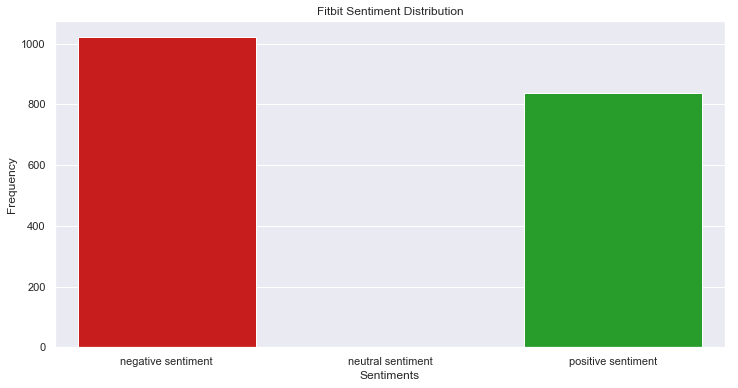

In [133]:
sns.set()
colors = ["red","yellow","green"]
sns.set()
sns.countplot(fitbit_df['Polarity'],palette=sns.xkcd_palette(colors))
plt.title('Fitbit Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')

In [134]:
cat_dtype = pd.api.types.CategoricalDtype(categories=["negative sentiment","neutral sentiment","positive sentiment"], ordered=True)
fossil_df['Polarity'] = fossil_df.Polarity.astype(cat_dtype)

(0, 1000)

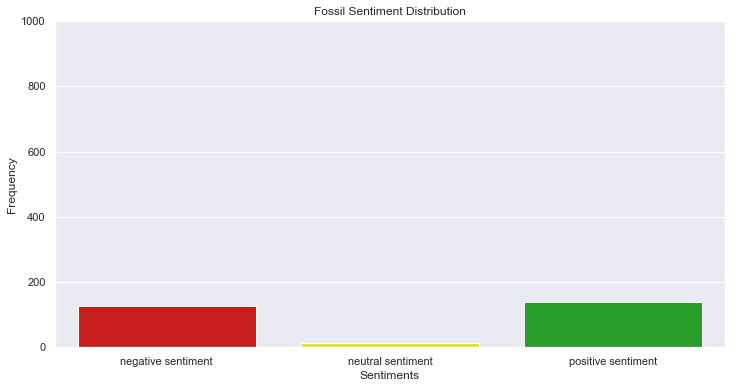

In [135]:
sns.set()
colors = ["red","yellow","green"]
sns.set()
sns.countplot(fossil_df['Polarity'],palette=sns.xkcd_palette(colors))
plt.title('Fossil Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
plt.ylim(0,1000)

(-0.5, 0.5)

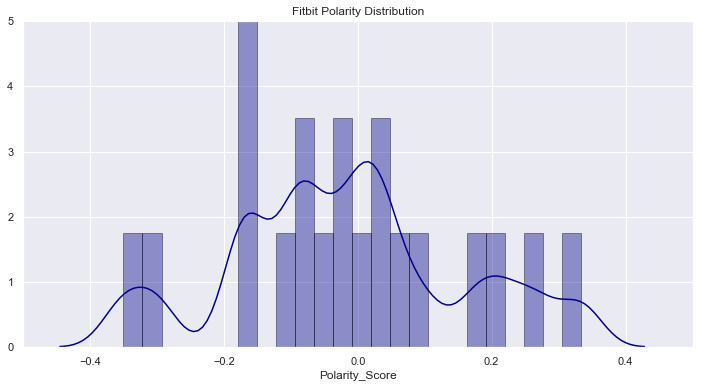

In [150]:
sns.distplot(fitbit_df['Polarity_Score'], hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
plt.title('Fitbit Polarity Distribution')
plt.ylim(0,5)
plt.xlim(-0.5,0.5)

(-0.5, 0.5)

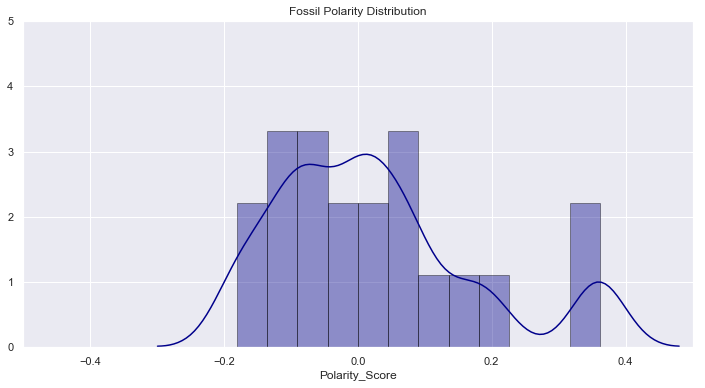

In [151]:
sns.distplot(fossil_df['Polarity_Score'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'})
plt.title('Fossil Polarity Distribution')
plt.ylim(0,5)
plt.xlim(-0.5,0.5)

### 4.4 : Correlate between Polarity Score with Ranking

In [140]:
import scipy
scipy.stats.spearmanr(fitbit_df['Polarity_Score'], fitbit_df['Ranking'])

SpearmanrResult(correlation=0.3261587377531592, pvalue=2.3617358861449367e-47)

In [141]:
import scipy
scipy.stats.spearmanr(fossil_df['Polarity_Score'], fossil_df['Ranking'])

SpearmanrResult(correlation=0.24678382369818677, pvalue=2.969723416628215e-05)

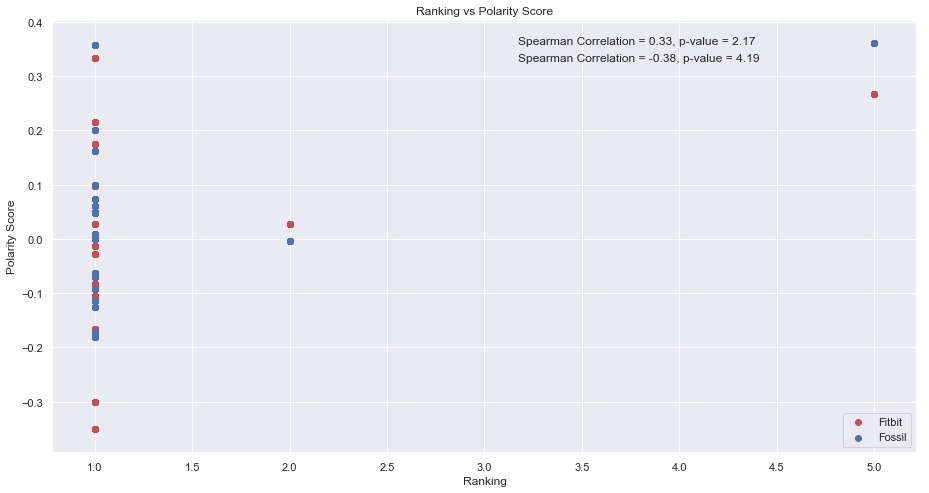

In [142]:
import matplotlib.pyplot as plt
fossil_df['Ranking'] = fossil_df['Ranking'].astype(int)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(fitbit_df['Ranking'], fitbit_df['Polarity_Score'], color='r', label = 'Fitbit')
ax.scatter(fossil_df['Ranking'], fossil_df['Polarity_Score'], color='b', label = 'Fossil')
ax.set_xlabel('Ranking')
ax.set_ylabel('Polarity Score')
ax.set_title('Ranking vs Polarity Score')
ax.text(3.17, 0.360,'Spearman Correlation = 0.33, p-value = 2.17')
ax.text(3.17, 0.328,'Spearman Correlation = -0.38, p-value = 4.19')
ax.legend()
plt.show()